# Average Ratings Data

In [1]:
import csv
import os
import pandas as pd

# Define file paths
input_file = 'avg_rating_output/part-r-00000'
output_file = 'avg_rating_output/avg_rating_output.csv'

# Read Hadoop output and write to CSV
if os.path.exists(input_file):
    with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
        csv_writer = csv.writer(outfile)
        csv_writer.writerow(['Key', 'Value'])  # Header row (optional)

        for line in infile:
            parts = line.strip().split('\t')  # Hadoop output is tab-separated
            if len(parts) == 2:
                csv_writer.writerow(parts)
else:
    print(f"File not found: {input_file}")

### Preview of Average Ratings Data

This table displays the first few rows of the average product ratings data, showing the product IDs and their computed average ratings. This helps verify that the data has been loaded and formatted correctly.

In [2]:
df = pd.read_csv('avg_rating_output/avg_rating_output.csv')
print(df.head())

          Key     Value
0  0006641040  4.351351
1  141278509X  5.000000
2  2734888454  3.500000
3  2841233731  5.000000
4  7310172001  4.751445


### Top 30 Products by Average Rating

The following bar plot visualizes the top 30 products with the highest average ratings. This helps identify which products are most highly rated by customers. The table above the plot lists these products and their average ratings.

,Key,Value
37129,B00214BO58,5.0
42070,B002PDYN44,5.0
42053,B002P9QAJE,5.0
42054,B002P9QRCO,5.0
42057,B002PA1KW0,5.0
42062,B002PA7466,5.0
42064,B002PAHIWQ,5.0
42065,B002PAJFGS,5.0
42066,B002PALD4K,5.0
42067,B002PANI1G,5.0


C:\Users\Asus\AppData\Local\Temp\ipykernel_12136\3893806305.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top, x='Key', y='Value', palette='mako')


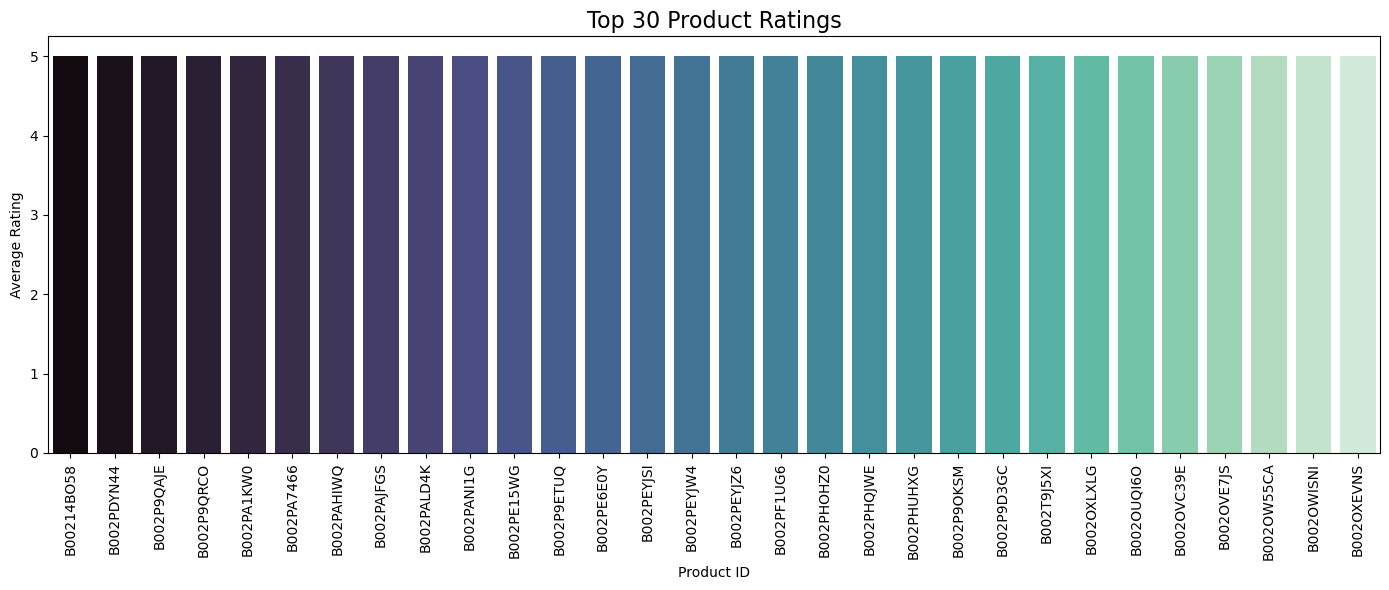

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Value is numeric
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')


# Sort by average rating
df_sorted = df.sort_values(by='Value', ascending=False)

# Show only top 30 rated products for clarity and speed
top_n = 30
df_top = df_sorted.head(top_n)

# Display the top N products as a table
display(df_top)

plt.figure(figsize=(14, 6))
sns.barplot(data=df_top, x='Key', y='Value', palette='mako')
plt.xticks(rotation=90)
plt.title(f'Top {top_n} Product Ratings', fontsize=16)
plt.xlabel('Product ID')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

### Distribution of Products by Rating Range

This bar plot shows how many products fall into each average rating range (e.g., 1.0–1.9, 2.0–2.9, etc.). It provides insight into the overall quality distribution of products based on customer ratings.

C:\Users\Asus\AppData\Local\Temp\ipykernel_12136\2730669750.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range_counts.index, y=range_counts.values, palette='flare')


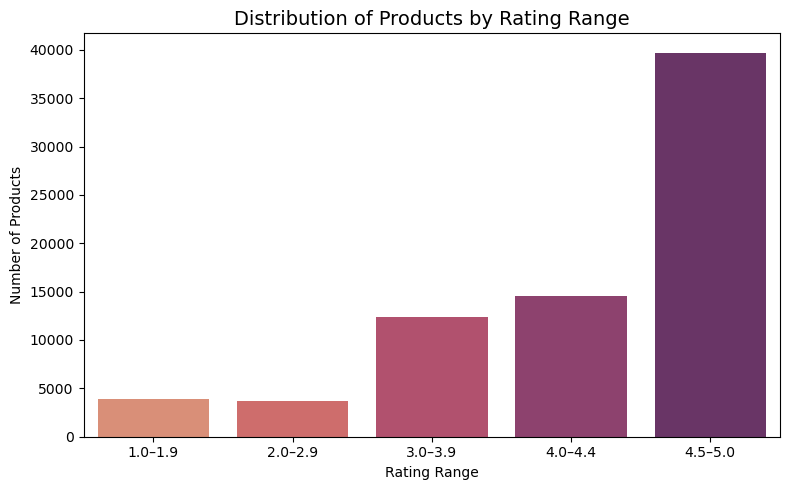

In [4]:
# Create bins for rating ranges
bins = [0, 1.99, 2.99, 3.99, 4.49, 5.01]
labels = ['1.0–1.9', '2.0–2.9', '3.0–3.9', '4.0–4.4', '4.5–5.0']
df['RatingRange'] = pd.cut(df['Value'], bins=bins, labels=labels, right=True)

# Count products in each bin
range_counts = df['RatingRange'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=range_counts.index, y=range_counts.values, palette='flare')
plt.title('Distribution of Products by Rating Range', fontsize=14)
plt.xlabel('Rating Range')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()

### Histogram of Average Product Ratings

The histogram below illustrates the distribution of average ratings across all products. It helps to understand whether most products are rated highly, poorly, or somewhere in between.

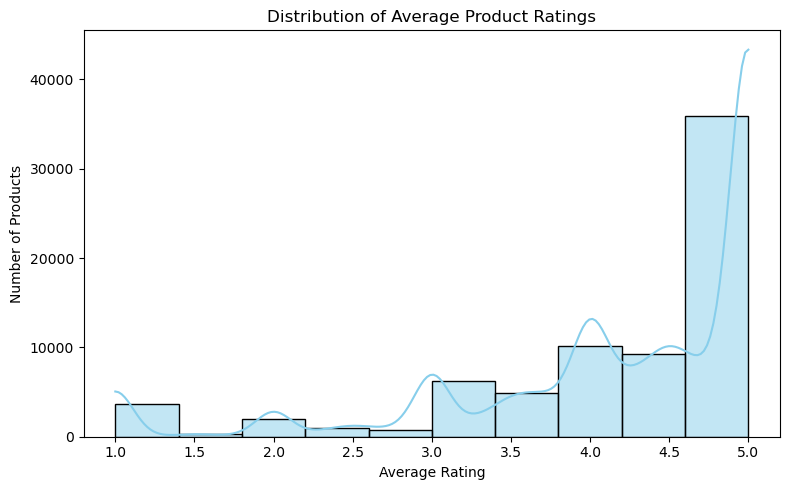

In [5]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Value'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Average Product Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Products')
plt.tight_layout()
plt.show()

### Boxplot of Average Product Ratings

This boxplot visualizes the spread and central tendency of average product ratings, highlighting the median, quartiles, and potential outliers.

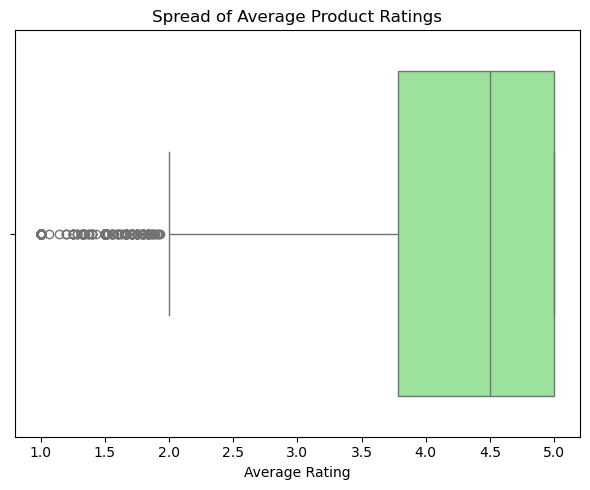

In [6]:
plt.figure(figsize=(6, 5))
sns.boxplot(x=df['Value'], color='lightgreen')
plt.title('Spread of Average Product Ratings')
plt.xlabel('Average Rating')
plt.tight_layout()
plt.show()

### Pie Chart: Percentage of Products per Rounded Rating

The pie chart below shows the percentage of products for each rounded average rating (from 1 to 5). This gives a quick overview of how product ratings are distributed in discrete steps.

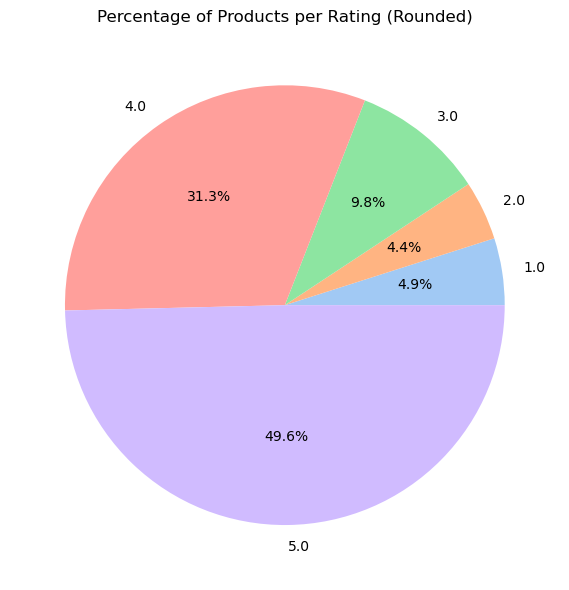

In [7]:
df['RoundedRating'] = df['Value'].round()
rating_counts = df['RoundedRating'].value_counts().sort_index()

plt.figure(figsize=(6, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Percentage of Products per Rating (Rounded)')
plt.tight_layout()
plt.show()

# Reviews Per Year Data

In [8]:
import csv
import os
import pandas as pd

# Define file paths
input_file = 'reviews_per_year/part-r-00000'
output_file = 'reviews_per_year/reviews_per_year.csv'

# Read Hadoop output and write to CSV
if os.path.exists(input_file):
    with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
        csv_writer = csv.writer(outfile)
        csv_writer.writerow(['Key', 'Value'])  # Header row (optional)

        for line in infile:
            parts = line.strip().split('\t')  # Hadoop output is tab-separated
            if len(parts) == 2:
                csv_writer.writerow(parts)
else:
    print(f"File not found: {input_file}")

### Preview of Reviews Per Year Data

This table shows the first few rows of the reviews-per-year dataset, confirming that the data has been loaded and is ready for analysis.

In [9]:
df = pd.read_csv('reviews_per_year/reviews_per_year.csv')
print(df.head())

               Key  Value
0  1999_0006641040      2
1  1999_B00004CI84      1
2  1999_B00004CXX9      2
3  1999_B00004RYGX      1
4  2000_B00002N8SM      1


### Data Preparation: Splitting Year and Product ID

This step splits the combined key into separate 'Year' and 'ProductID' columns and ensures the data types are correct for further analysis.

In [10]:
# Split 'Key' into 'Year' and 'ProductID'
df[['Year', 'ProductID']] = df['Key'].str.split('_', expand=True)
df['Year'] = df['Year'].astype(int)
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

### Total Number of Reviews Per Year

The line plot below shows the total number of product reviews submitted each year. This helps identify trends in review activity over time.

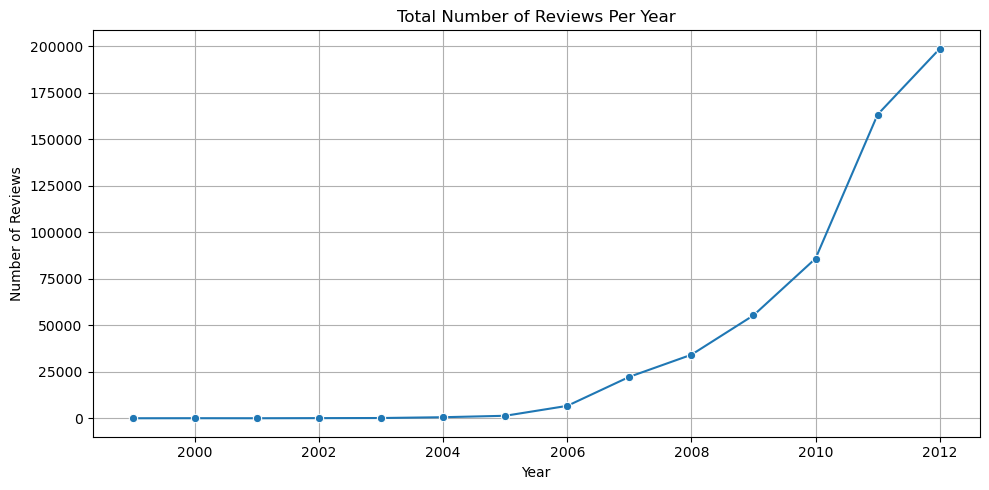

In [11]:
yearly_reviews = df.groupby('Year')['Value'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_reviews, x='Year', y='Value', marker='o')
plt.title('Total Number of Reviews Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.tight_layout()
plt.show()

### Top 10 Most Reviewed Products (All Time)

This bar plot highlights the products that have received the most reviews overall, helping to identify the most popular or discussed products.

C:\Users\Asus\AppData\Local\Temp\ipykernel_12136\499027957.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='Value', y='ProductID', palette='magma')


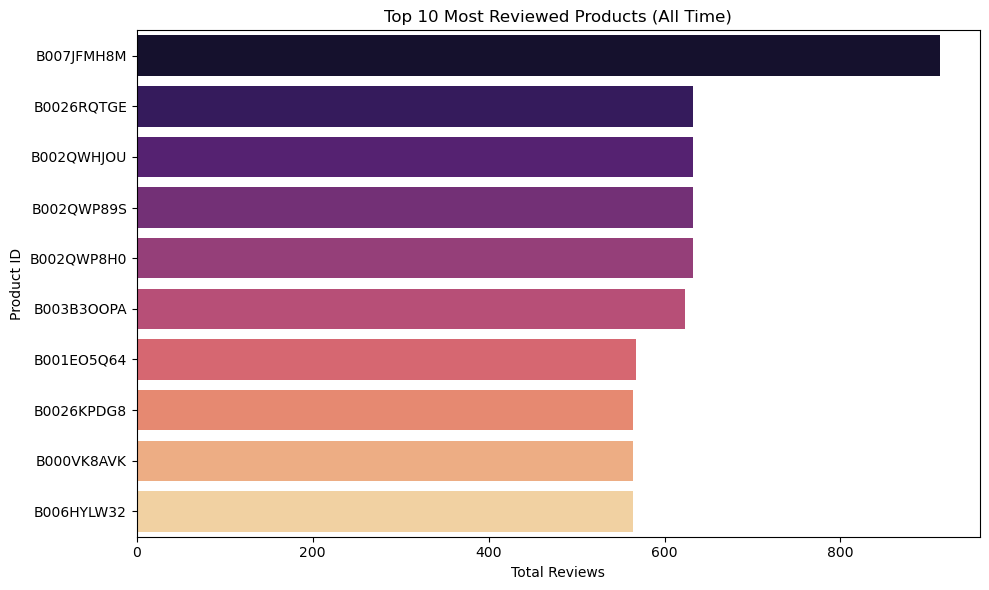

In [12]:
total_reviews = df.groupby('ProductID')['Value'].sum().reset_index()
top_products = total_reviews.sort_values('Value', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='Value', y='ProductID', palette='magma')
plt.title('Top 10 Most Reviewed Products (All Time)')
plt.xlabel('Total Reviews')
plt.ylabel('Product ID')
plt.tight_layout()
plt.show()

### Heatmap: Reviews Per Year for Top 10 Products

The heatmap below shows the number of reviews per year for the top 10 most reviewed products. This visualization helps to see how review activity for these products changes over time.

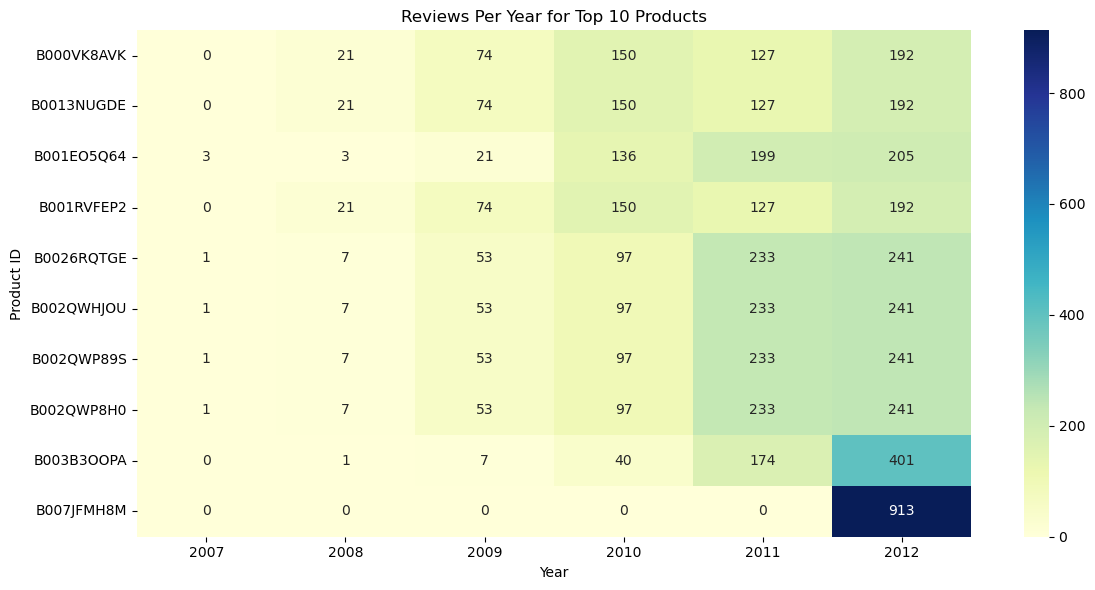

In [13]:
top_n = df.groupby('ProductID')['Value'].sum().nlargest(10).index
heatmap_data = df[df['ProductID'].isin(top_n)].pivot_table(index='ProductID', columns='Year', values='Value', fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Reviews Per Year for Top 10 Products')
plt.xlabel('Year')
plt.ylabel('Product ID')
plt.tight_layout()
plt.show()

### Review Trends for Selected Products

This line plot compares the yearly review trends for two selected products, allowing for a direct comparison of their popularity over time.

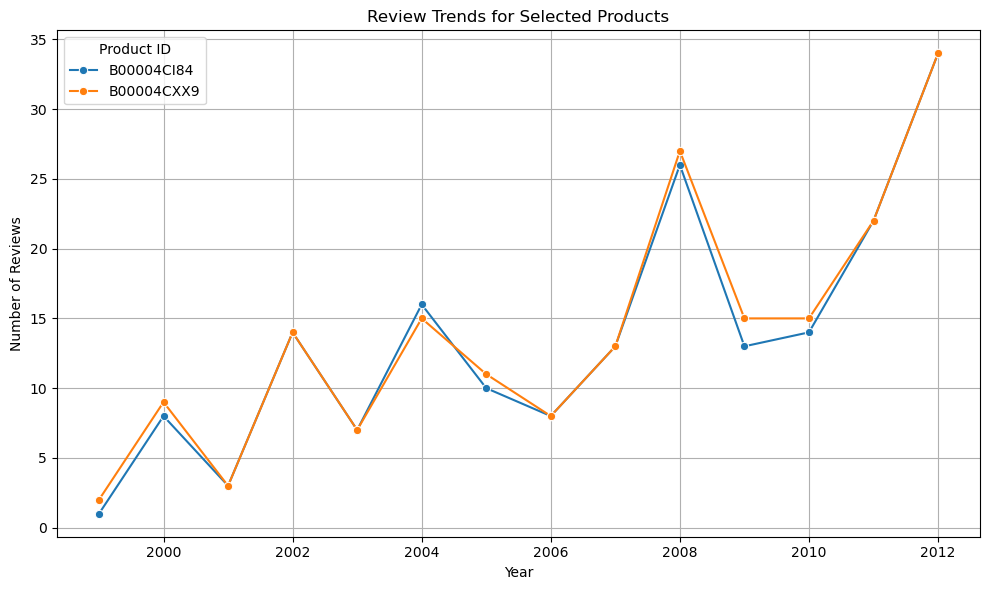

In [14]:
selected_products = ['B00004CI84', 'B00004CXX9']  # replace with actual IDs
filtered = df[df['ProductID'].isin(selected_products)]

plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered, x='Year', y='Value', hue='ProductID', marker='o')
plt.title('Review Trends for Selected Products')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend(title='Product ID')
plt.grid(True)
plt.tight_layout()
plt.show()

### Number of Unique Products Reviewed Each Year

The bar plot below shows how many unique products received reviews each year, providing insight into the growth of the product catalog and review activity.

C:\Users\Asus\AppData\Local\Temp\ipykernel_12136\2010893318.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unique_products_per_year, x='Year', y='ProductID', palette='crest')


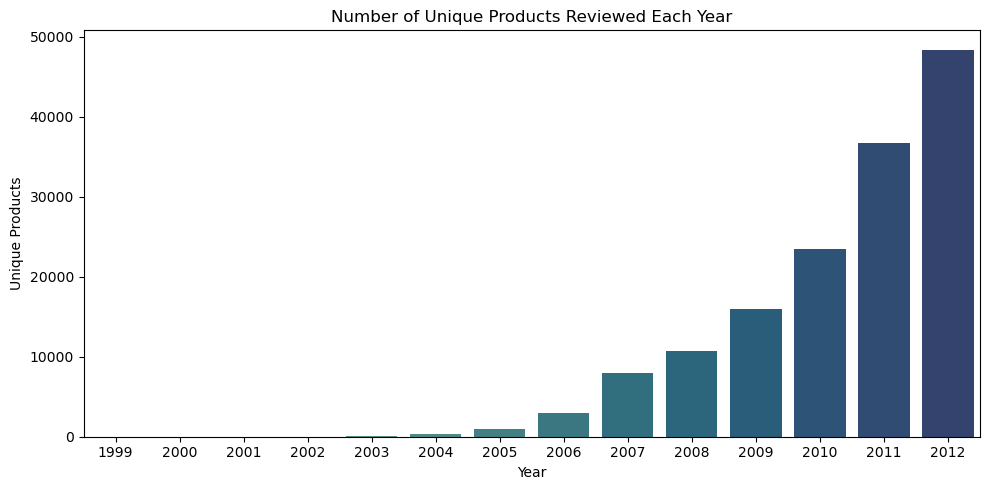

In [15]:
unique_products_per_year = df.groupby('Year')['ProductID'].nunique().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=unique_products_per_year, x='Year', y='ProductID', palette='crest')
plt.title('Number of Unique Products Reviewed Each Year')
plt.xlabel('Year')
plt.ylabel('Unique Products')
plt.tight_layout()
plt.show()

# Review Sentiment Data

In [16]:
import csv
import os
import pandas as pd

# Define file paths
input_file = 'reviews_sentiment/part-r-00000'
output_file = 'reviews_sentiment/reviews_sentiment.csv'

# Read Hadoop output and write to CSV
if os.path.exists(input_file):
    with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
        csv_writer = csv.writer(outfile)
        csv_writer.writerow(['Key', 'Value'])  # Header row (optional)

        for line in infile:
            parts = line.strip().split('\t')  # Hadoop output is tab-separated
            if len(parts) == 2:
                csv_writer.writerow(parts)
else:
    print(f"File not found: {input_file}")

### Preview of Review Sentiment Data

This table displays the sentiment analysis results, showing the number of reviews classified as Positive, Neutral, or Negative.

In [17]:
df = pd.read_csv('reviews_sentiment/reviews_sentiment.csv')
print(df.head())

        Key   Value
0  Negative   82012
1   Neutral   42638
2  Positive  443777


### Pie Chart: Review Sentiment Distribution

The pie chart below visualizes the proportion of reviews in each sentiment category, providing a quick overview of customer satisfaction.

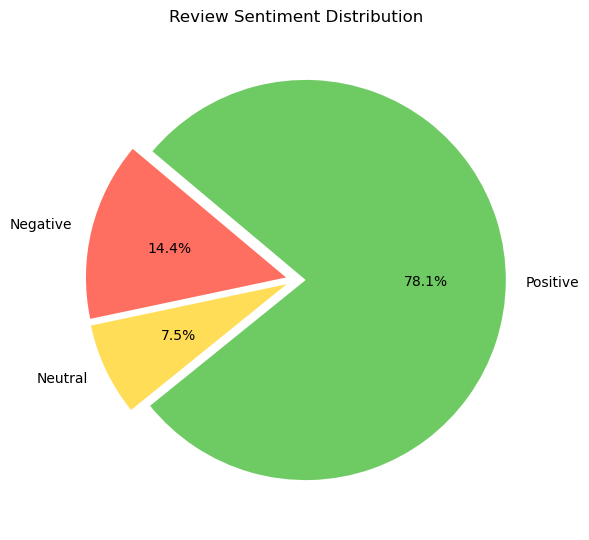

In [18]:
import matplotlib.pyplot as plt

# Pie chart
plt.figure(figsize=(6, 6))
colors = ['#FF6F61', '#FFDD57', '#6ECB63']
plt.pie(df['Value'], labels=df['Key'], autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.05, 0.05, 0.05))
plt.title('Review Sentiment Distribution')
plt.tight_layout()
plt.show()

### Bar Plot: Number of Reviews by Sentiment

This bar plot shows the absolute number of reviews for each sentiment category, making it easy to compare the volume of positive, neutral, and negative feedback.

C:\Users\Asus\AppData\Local\Temp\ipykernel_12136\1743480761.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Key', y='Value', palette='Set2')


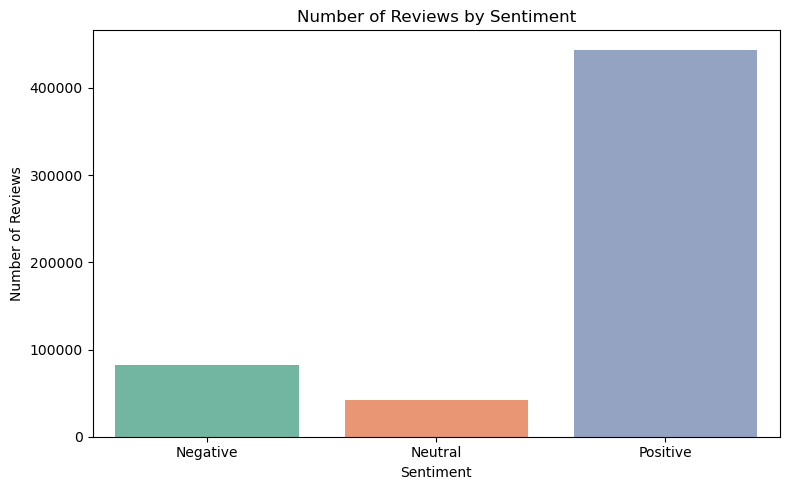

In [19]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Key', y='Value', palette='Set2')
plt.title('Number of Reviews by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

### Donut Chart: Review Sentiment Breakdown

The donut chart below provides another visualization of the sentiment distribution, emphasizing the relative proportions of each sentiment class.

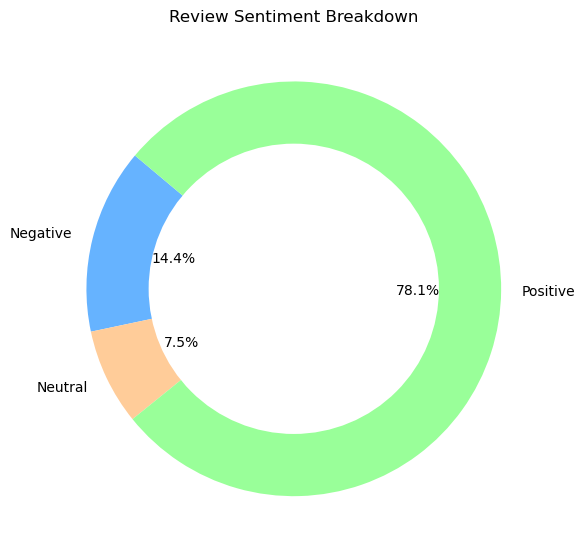

In [20]:
# Donut chart
plt.figure(figsize=(6, 6))
colors = ['#66b3ff','#ffcc99','#99ff99']
wedges, texts, autotexts = plt.pie(df['Value'], labels=df['Key'], autopct='%1.1f%%', startangle=140, colors=colors)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Review Sentiment Breakdown')
plt.tight_layout()
plt.show()

# Yearly Reviews Data

In [21]:
import csv
import os
import pandas as pd

# Define file paths
input_file = 'reviews_year/part-r-00000'
output_file = 'reviews_year/reviews_year.csv'

# Read Hadoop output and write to CSV
if os.path.exists(input_file):
    with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
        csv_writer = csv.writer(outfile)
        csv_writer.writerow(['Key', 'Value'])  # Header row (optional)

        for line in infile:
            parts = line.strip().split('\t')  # Hadoop output is tab-separated
            if len(parts) == 2:
                csv_writer.writerow(parts)
else:
    print(f"File not found: {input_file}")

### Preview of Yearly Reviews Data

This table displays the first few rows of the yearly reviews dataset, showing the number of reviews for each year. It helps confirm that the data has been loaded correctly for further analysis.

In [22]:
df = pd.read_csv('reviews_year/reviews_year.csv')
print(df.head())

    Key  Value
0  1999      6
1  2000     32
2  2001     13
3  2002     73
4  2003    132


### Line Plot: Total Number of Reviews Per Year

The following line plot visualizes the total number of product reviews submitted each year. This helps to identify trends and growth in review activity over time.

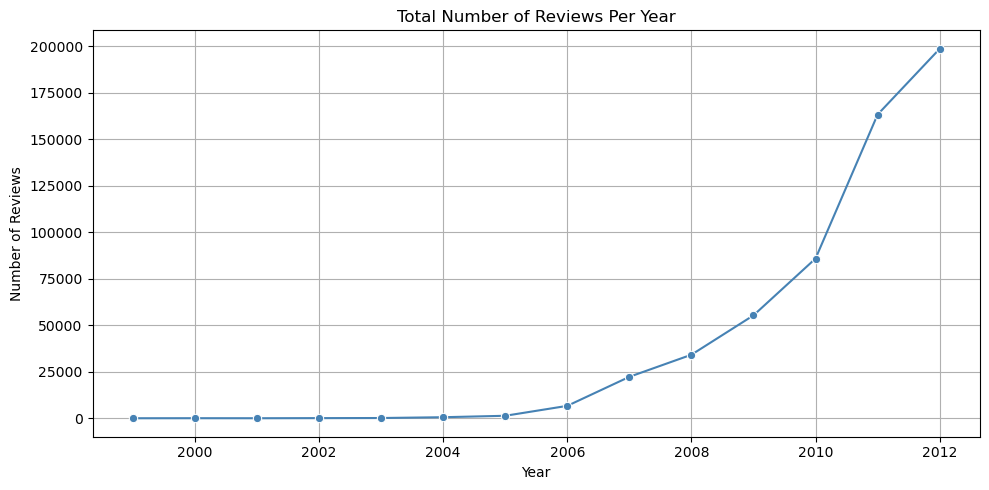

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Key'] = df['Key'].astype(int)
df['Value'] = df['Value'].astype(int)

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Key', y='Value', marker='o', color='steelblue')
plt.title('Total Number of Reviews Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.tight_layout()
plt.show()


### Bar Plot: Number of Reviews Per Year

This bar plot provides another perspective on the yearly review counts, making it easy to compare the number of reviews across different years.

C:\Users\Asus\AppData\Local\Temp\ipykernel_12136\4263189139.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Key', y='Value', palette='Blues_d')


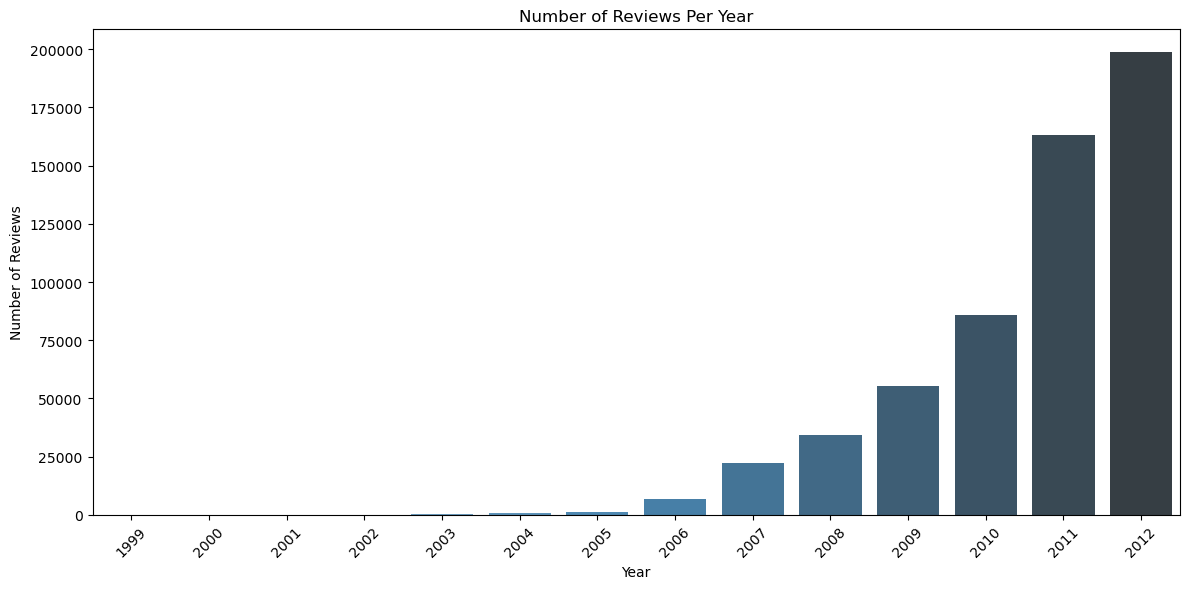

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Key', y='Value', palette='Blues_d')
plt.title('Number of Reviews Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Smoothed Trend: 3-Year Rolling Average of Reviews

The plot below shows a 3-year rolling average of the number of reviews per year, alongside the actual yearly counts. This smoothing helps to reveal longer-term trends by reducing the impact of short-term fluctuations.

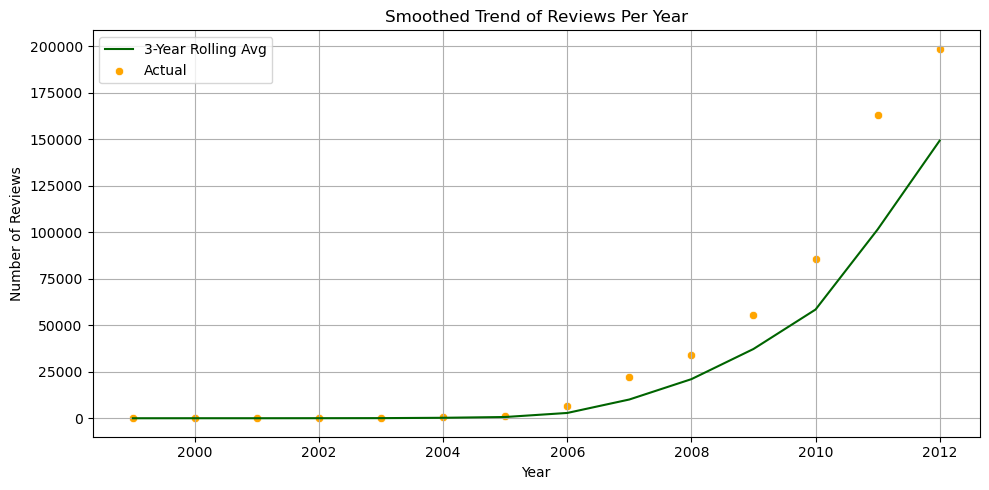

In [25]:
df['Rolling_Avg'] = df['Value'].rolling(window=3, min_periods=1).mean()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Key', y='Rolling_Avg', color='darkgreen', label='3-Year Rolling Avg')
sns.scatterplot(data=df, x='Key', y='Value', color='orange', label='Actual')
plt.title('Smoothed Trend of Reviews Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Advanced Analysis: Integrating All Data Sources

In this section, we combine and analyze the average ratings, reviews per year, review sentiment, and yearly review counts to extract deeper insights about product performance, trends, and customer sentiment over time.

### Merge Average Ratings with Total Reviews and Sentiment

We merge the average ratings, total number of reviews per product, and sentiment data to explore relationships between product popularity, quality, and customer sentiment.

In [26]:
import pandas as pd

# Load all CSVs
avg_ratings = pd.read_csv('avg_rating_output/avg_rating_output.csv')
reviews_per_year = pd.read_csv('reviews_per_year/reviews_per_year.csv')
sentiment = pd.read_csv('reviews_sentiment/reviews_sentiment.csv')
reviews_year = pd.read_csv('reviews_year/reviews_year.csv')

# Prepare total reviews per product
reviews_per_year[['Year', 'ProductID']] = reviews_per_year['Key'].str.split('_', expand=True)
total_reviews_per_product = reviews_per_year.groupby('ProductID')['Value'].sum().reset_index()
total_reviews_per_product.columns = ['ProductID', 'TotalReviews']

# Merge with average ratings
avg_ratings = avg_ratings.rename(columns={'Key': 'ProductID', 'Value': 'AvgRating'})
merged = pd.merge(avg_ratings, total_reviews_per_product, on='ProductID', how='left')
merged['TotalReviews'] = merged['TotalReviews'].fillna(0).astype(int)
merged['AvgRating'] = pd.to_numeric(merged['AvgRating'], errors='coerce')
merged = merged.dropna(subset=['AvgRating'])
merged.head()

,ProductID,AvgRating,TotalReviews
0,0006641040,4.351351,37
1,141278509X,5.000000,1
2,2734888454,3.500000,2
3,2841233731,5.000000,1
4,7310172001,4.751445,173


### Relationship Between Average Rating and Number of Reviews

This scatter plot shows whether highly-rated products tend to have more reviews, or if there is a trade-off between popularity and quality.

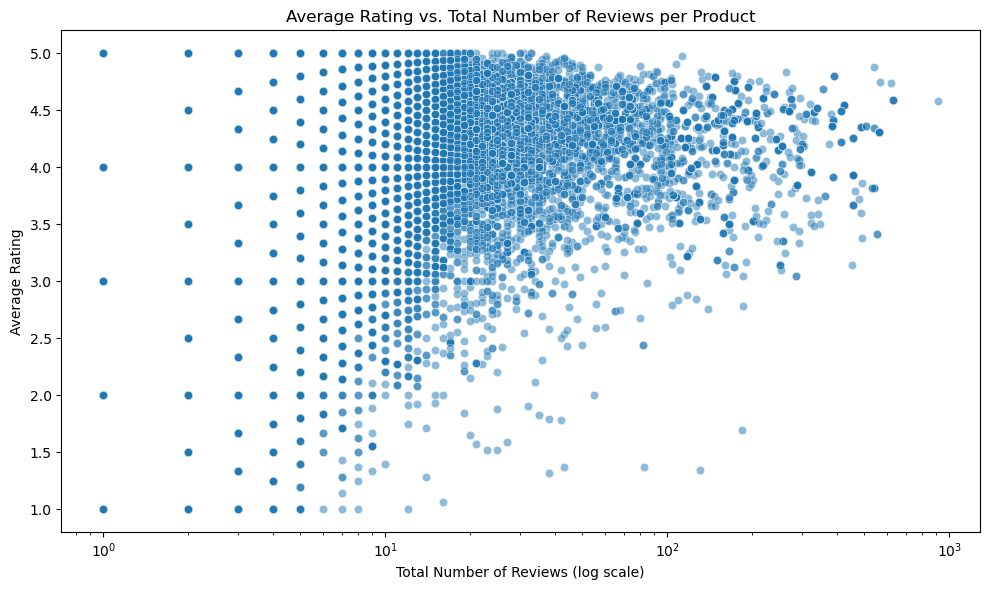

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(data=merged, x='TotalReviews', y='AvgRating', alpha=0.5)
plt.xscale('log')
plt.xlabel('Total Number of Reviews (log scale)')
plt.ylabel('Average Rating')
plt.title('Average Rating vs. Total Number of Reviews per Product')
plt.tight_layout()
plt.show()

### Top Products by Both Rating and Review Count

This table lists products that are both highly rated (average rating ≥ 4.5) and popular (at least 100 reviews), highlighting products that excel in both quality and popularity.

In [28]:
top_products = merged[(merged['AvgRating'] >= 4.5) & (merged['TotalReviews'] >= 100)]
top_products_sorted = top_products.sort_values(['AvgRating', 'TotalReviews'], ascending=[False, False])
top_products_sorted.head(10)

,ProductID,AvgRating,TotalReviews
8253,B000ED9L9E,4.973451,113
17287,B000O5DI1E,4.906542,107
16945,B000NMJWZO,4.881919,542
49159,B003QDRJXY,4.837121,264
47846,B003KRHDMI,4.833333,132
71762,B007R900WA,4.823529,170
11212,B000GAT6NG,4.802057,389
28118,B001E8DHPW,4.802057,389
56627,B004EAGP74,4.802057,389
8952,B000ET4SM8,4.801136,176


### Average Rating Trend for Most Reviewed Products Over Time

This plot shows how the average rating for the top 5 most reviewed products changes over the years, revealing if popularity affects perceived quality.

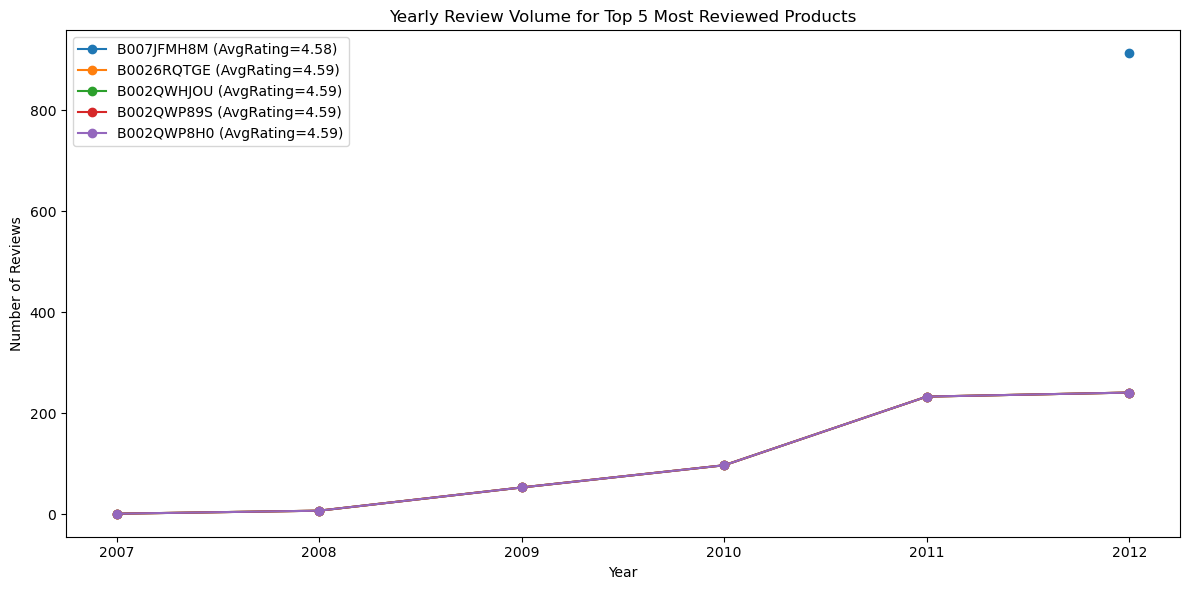

In [29]:
# Get top 5 most reviewed products
top5_ids = merged.sort_values('TotalReviews', ascending=False).head(5)['ProductID'].tolist()
df_year = reviews_per_year.copy()
df_year[['Year', 'ProductID']] = df_year['Key'].str.split('_', expand=True)
df_year['Year'] = df_year['Year'].astype(int)
df_year['Value'] = pd.to_numeric(df_year['Value'], errors='coerce')

plt.figure(figsize=(12,6))
for pid in top5_ids:
    yearly = df_year[df_year['ProductID'] == pid].sort_values('Year')
    # Get average rating for this product (assume static)
    avg_rating = merged[merged['ProductID'] == pid]['AvgRating'].values[0]
    plt.plot(yearly['Year'], yearly['Value'], marker='o', label=f'{pid} (AvgRating={avg_rating:.2f})')
plt.title('Yearly Review Volume for Top 5 Most Reviewed Products')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend()
plt.tight_layout()
plt.show()

### Distribution of Average Ratings for Products with High vs. Low Review Counts

This plot compares the distribution of average ratings for products with many reviews (≥100) vs. those with few reviews (&lt;100).

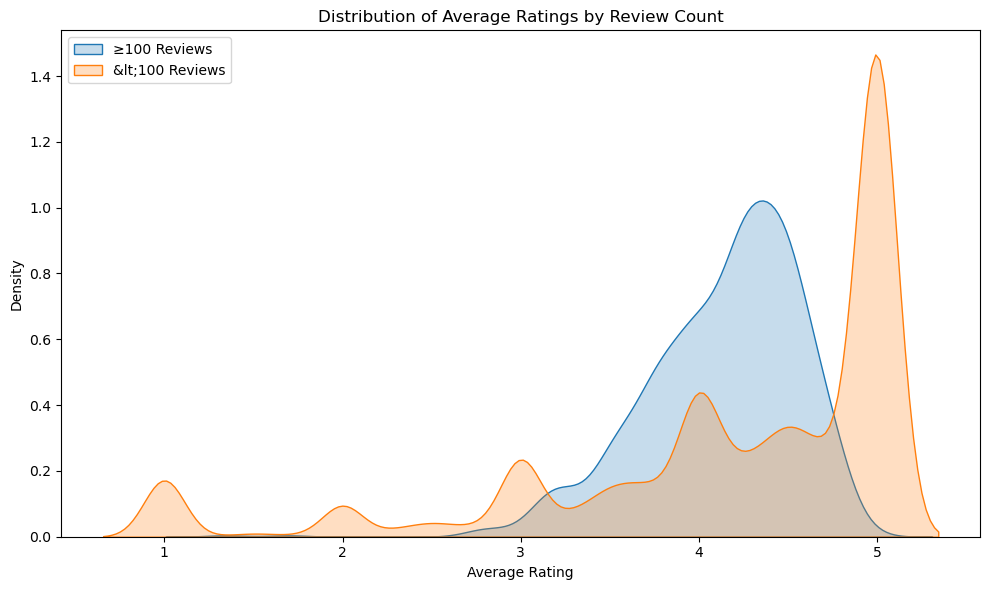

In [30]:
plt.figure(figsize=(10,6))
sns.kdeplot(merged[merged['TotalReviews'] >= 100]['AvgRating'], label='≥100 Reviews', fill=True)
sns.kdeplot(merged[merged['TotalReviews'] < 100]['AvgRating'], label='&lt;100 Reviews', fill=True)
plt.xlabel('Average Rating')
plt.ylabel('Density')
plt.title('Distribution of Average Ratings by Review Count')
plt.legend()
plt.tight_layout()
plt.show()